In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 


data = pd.read_csv( 'heart.csv',header='infer' )
data.columns = ['age','sex','cp','bp','cholesterol','blood sugar','ecg','heart rate','angina',
               'oldpeak','slope','major vessels','thal','heart attack']
data

,age,sex,cp,bp,cholesterol,blood sugar,ecg,heart rate,angina,oldpeak,slope,major vessels,thal,heart attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
y = data['heart attack']
X = data.drop(columns=['heart attack'])

# Normalize
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
X

,age,sex,cp,bp,cholesterol,blood sugar,ecg,heart rate,angina,oldpeak,slope,major vessels,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [5]:
print('Class distribution:')
y.value_counts()

Class distribution:


1    165
0    138
Name: heart attack, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print('Class distribution in training set:')
print(Y_train.value_counts())

print('\nClass distribution in test set:')
print(Y_test.value_counts())

Class distribution in training set:
1    131
0    111
Name: heart attack, dtype: int64

Class distribution in test set:
1    34
0    27
Name: heart attack, dtype: int64


## Variance

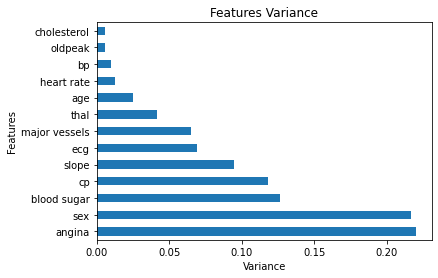

In [60]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit_transform(X)

selector.variances_

var = pd.Series(selector.variances_, index=X.columns)
var.nlargest(13).plot(kind='barh')

plt.title('Features Variance')
plt.xlabel("Variance")
plt.ylabel('Features') 
# plt.show()
plt.savefig(os.path.join('feature_var.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

## SelectKBest (Chi)

In [23]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))

         Features      Score
8          angina  38.914377
2              cp  20.866033
11  major vessels  16.610191
9         oldpeak  11.716815
1             sex   7.576835
10          slope   4.902048
7      heart rate   2.735347
12           thal   1.930618
6             ecg   1.489135
0             age   1.039771
3              bp   0.489248
5     blood sugar   0.202934
4     cholesterol   0.111905


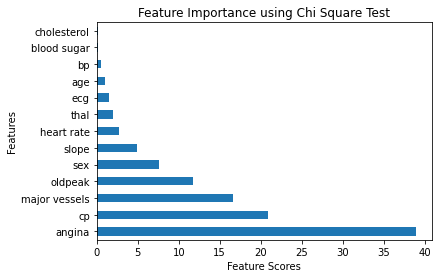

In [72]:
feat_chi2 = pd.Series(fit.scores_, index=X.columns)
feat_chi2.nlargest(13).plot(kind='barh')

plt.title('Feature Importance using Chi Square Test')
plt.xlabel("Feature Scores")
plt.ylabel('Features') 
#plt.show()
plt.savefig(os.path.join('feature_chi2.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

## Feature Importances

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=2)
#model_rf = RandomForestClassifier()
model.fit(X,y)
#model_rf.fit(X_train,y_train)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.08618521 0.03846961 0.12865376 0.0763358  0.0760286  0.00990295
 0.02156934 0.11602311 0.06139552 0.10108512 0.05561379 0.12731618
 0.10142101]


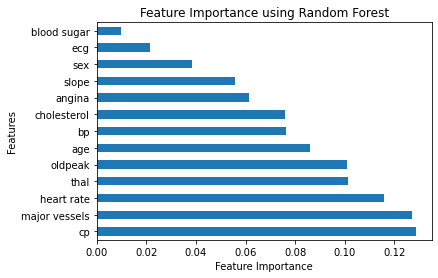

In [62]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.title('Feature Importance using Random Forest')
plt.xlabel("Feature Importance")
plt.ylabel('Features') 
#plt.show()
plt.savefig(os.path.join('feature_rf.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

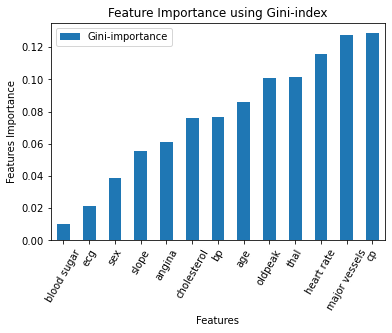

In [63]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=60)
plt.title('Feature Importance using Gini-index')
plt.xlabel("Features")
plt.ylabel('Features Importance') 
#plt.show()
plt.savefig(os.path.join('feature_gini.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

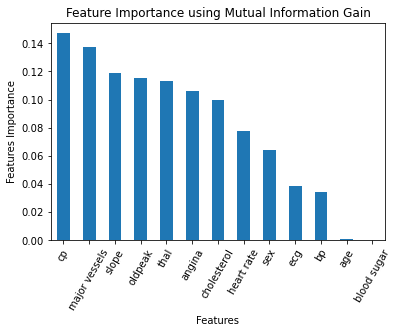

In [64]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

mi = mutual_info_classif(X, y)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False, inplace = True)
mi.plot(kind="bar",rot=60)

plt.title('Feature Importance using Mutual Information Gain')
plt.xlabel("Features")
plt.ylabel('Features Importance') 
#plt.show()
plt.savefig(os.path.join('feature_mi.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc = []
for feature in X_train.columns:
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train[feature].to_frame(), Y_train)
    y_pred = clf.predict(X_test[feature].to_frame())
    roc_auc.append(roc_auc_score(Y_test, y_pred))

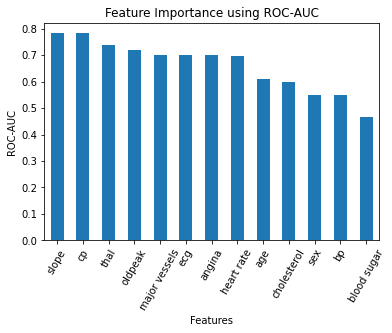

In [65]:
roc_values = pd.Series(roc_auc)
roc_values.index = X_train.columns
roc_values.sort_values(ascending =False, inplace = True)
roc_values.plot.bar(rot=60)

plt.title('Feature Importance using ROC-AUC')
plt.xlabel("Features")
plt.ylabel('ROC-AUC') 
#plt.show()
plt.savefig(os.path.join('feature_roc.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

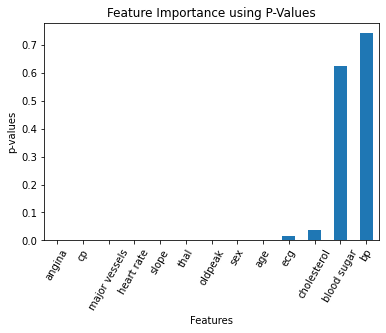

In [66]:
from sklearn.feature_selection import f_classif

sel = f_classif(X, y)
#sel

p_values = pd.Series(sel[1])
p_values.index = X.columns
p_values.sort_values(ascending = True, inplace = True)
p_values.plot.bar(rot=60)

plt.title('Feature Importance using P-Values')
plt.xlabel("Features")
plt.ylabel('p-values') 
#plt.show()
plt.savefig(os.path.join('feature_p_val.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

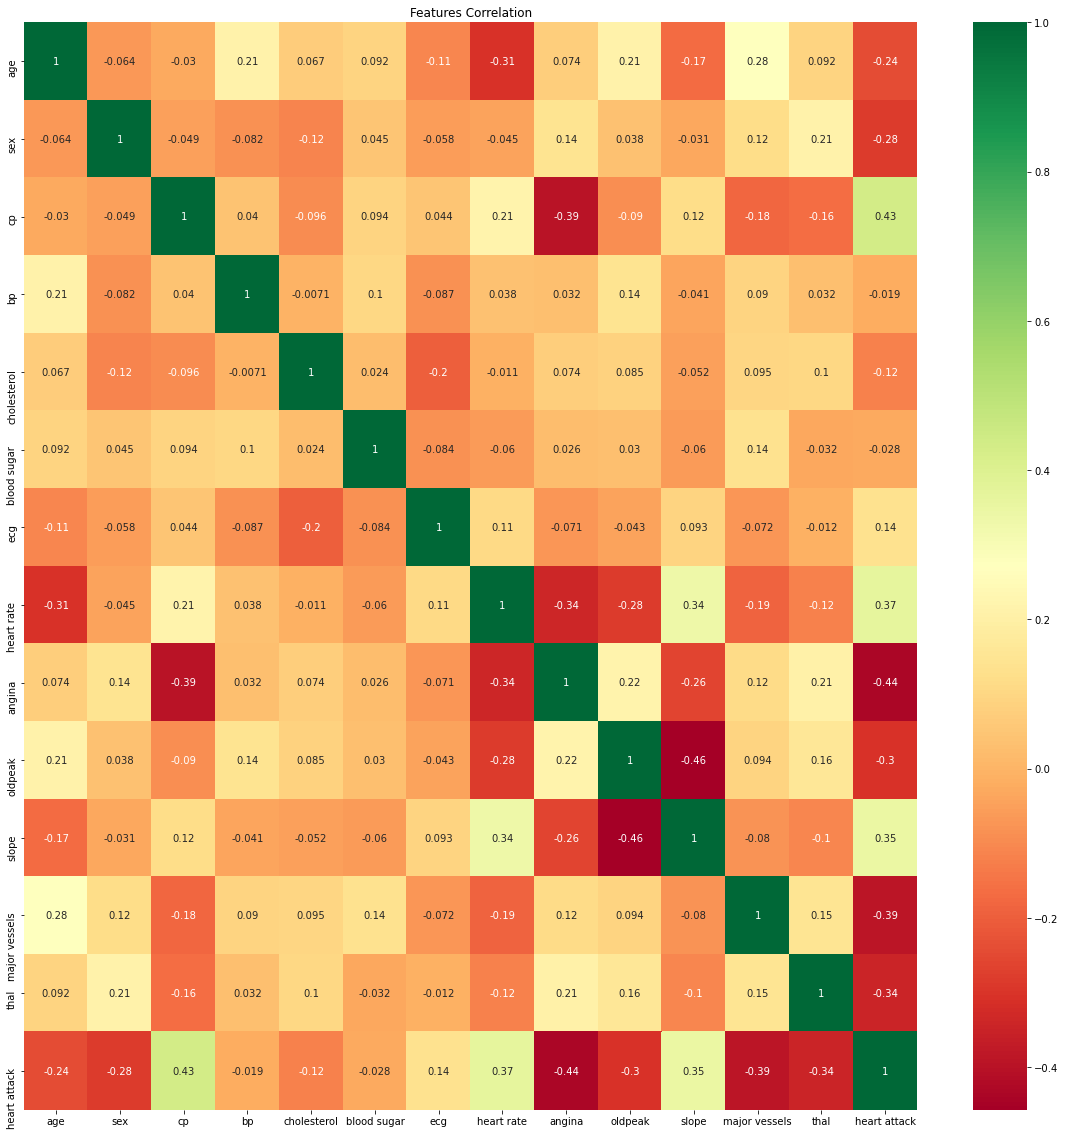

In [67]:
import seaborn as sns
#get correlations of each features in dataset
drebin_all_processed = pd.concat([X,y], axis = 1) #concatenate column
corrmat = drebin_all_processed.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(drebin_all_processed[top_corr_features].corr(),annot=True,cmap="RdYlGn")

plt.title('Features Correlation')
#plt.show()
plt.savefig(os.path.join('corr1.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [68]:
corrdata = corrmat.abs().stack()
corrdata = corrdata.sort_values(ascending=False)
corrdata = corrdata[corrdata>0.4]
corrdata = corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1', 'features2', 'corr_value']
corrdata

,features1,features2,corr_value
0,slope,oldpeak,0.456803
1,oldpeak,slope,0.456803
2,heart attack,angina,0.436757
3,angina,heart attack,0.436757
4,cp,heart attack,0.433798
5,heart attack,cp,0.433798


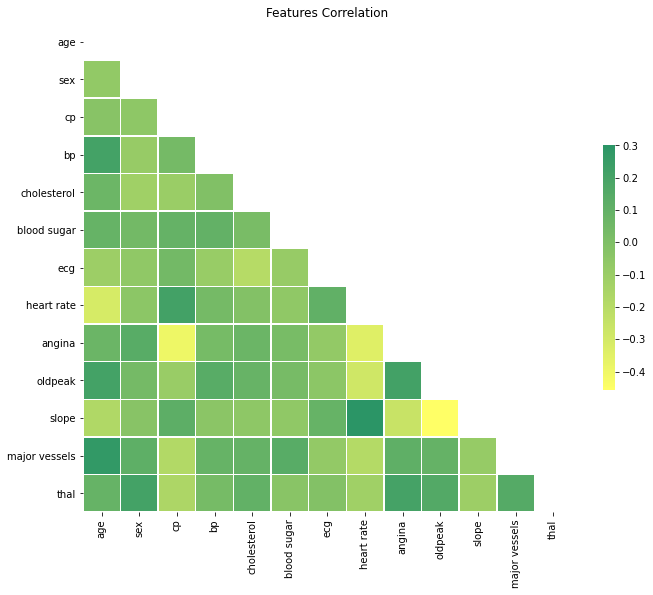

In [69]:
corr = X.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,mask=mask,cmap='summer_r',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


plt.title('Features Correlation')
#plt.show()
plt.savefig(os.path.join('corr2.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

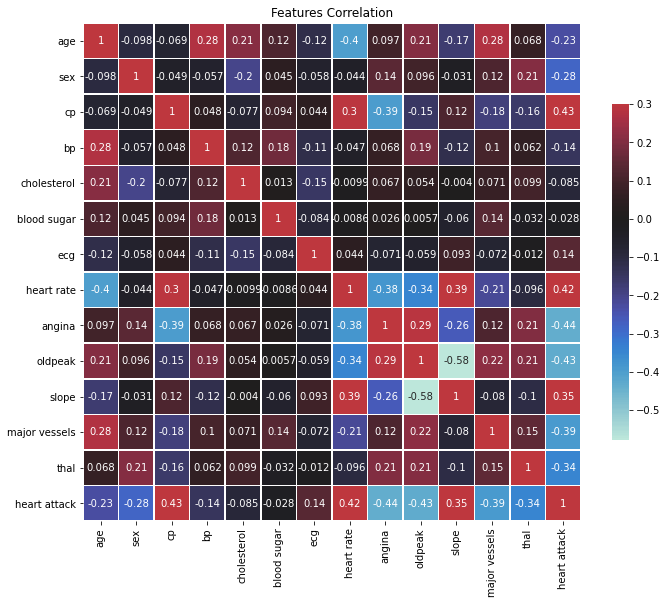

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()

plt.title('Features Correlation')
#lt.show()
plt.savefig(os.path.join('corr3.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

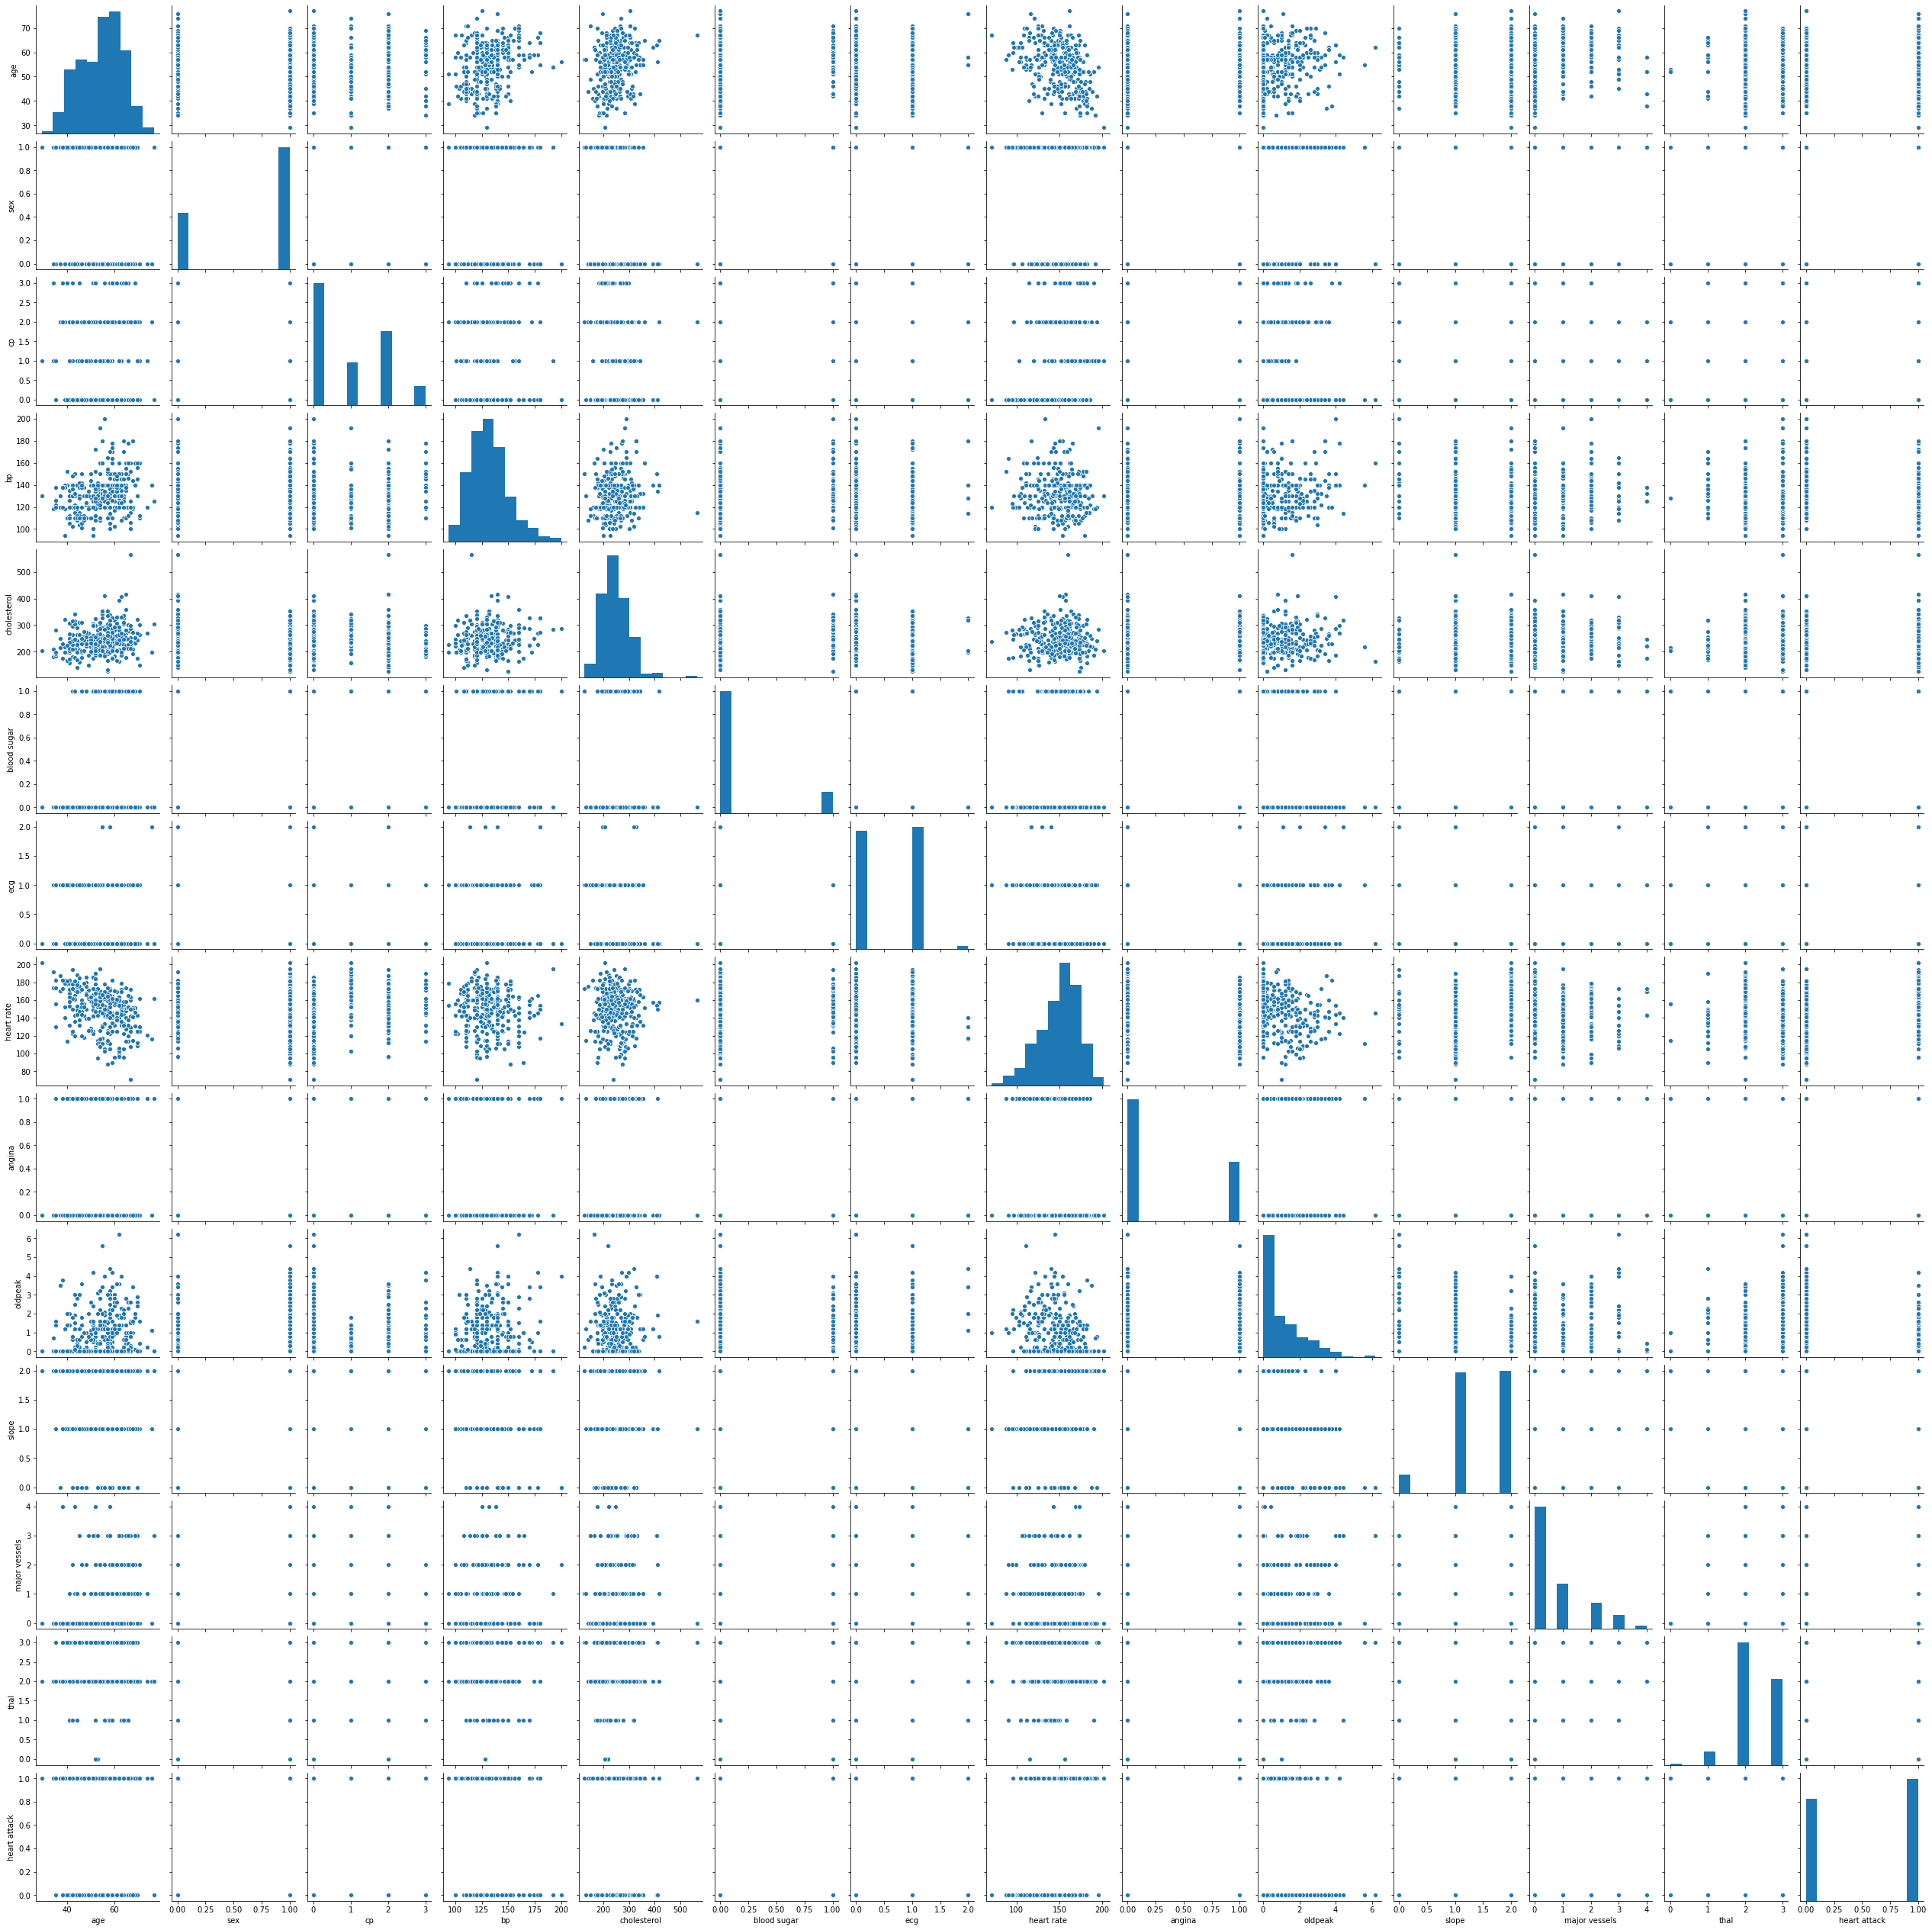

<Figure size 432x288 with 0 Axes>

In [48]:
sns.pairplot(data)
# plt.title('Features Pairplot')
plt.show()
plt.savefig(os.path.join('pair.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

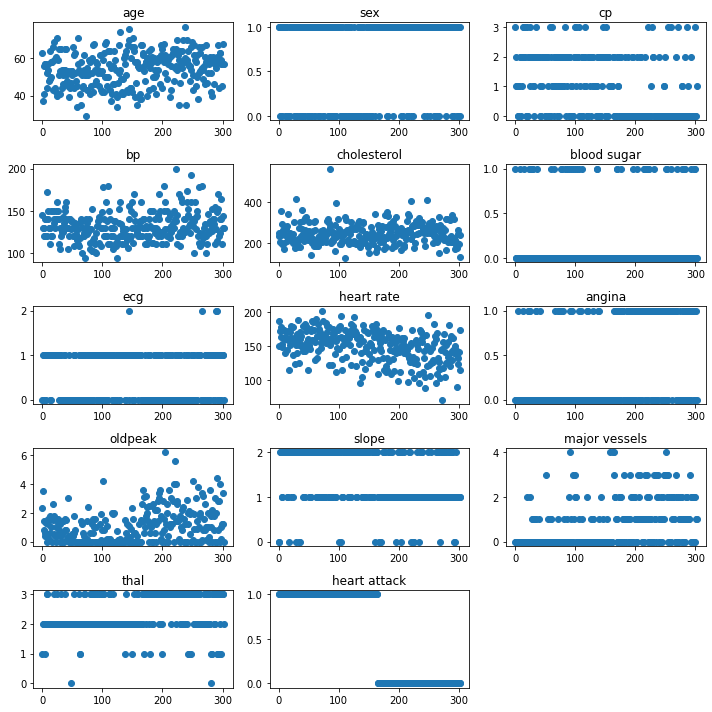

In [71]:
for i,col in enumerate(data.columns.values):
    plt.subplot(5,3,i+1)
    plt.scatter([i for i in range(303)],data[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()

# plt.title('Features Distributions')
#plt.show()
plt.savefig(os.path.join('feat_dist.png'), dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [56]:
out=[]
def Zscore_outlier(df, feature):
    count = 0 
    for i in df: 
        z = (i-np.mean(df))/np.std(df)
        if np.abs(z) > 2: 
            out.append(i)
            X[feature] = X[feature].replace(i, np.mean(df))
            count+=1
    print("Outliers:",out)
    print("Number of outliers for",feature, ": ", count )
features = ['bp', 'age', 'cholesterol', 'heart rate', 'oldpeak' ]
for feature in features:
    Zscore_outlier(X[feature],feature)

Outliers: [0.5754716981132075, 0.09433962264150944, 0.10377358490566038, 0.07547169811320754, 0.5471698113207547, 0.0660377358490566, 0.11320754716981132, 0.5849056603773585]
Number of outliers for bp :  8
Outliers: [0.5754716981132075, 0.09433962264150944, 0.10377358490566038, 0.07547169811320754, 0.5471698113207547, 0.0660377358490566, 0.11320754716981132, 0.5849056603773585, 0.875, 0.20833333333333334]
Number of outliers for age :  2
Outliers: [0.5754716981132075, 0.09433962264150944, 0.10377358490566038, 0.07547169811320754, 0.5471698113207547, 0.0660377358490566, 0.11320754716981132, 0.5849056603773585, 0.875, 0.20833333333333334, 0.4885844748858447, 0.4452054794520548, 0.454337899543379, 0.4383561643835616, 0.0776255707762557, 0.4315068493150685, 0.4269406392694064, 0.07077625570776255, 0.09360730593607305, 0.45662100456621, 0.0867579908675799, 0.4474885844748858, 0.4178082191780822, 0.4406392694063927, 0.091324200913242, 0.4223744292237443, 0.09817351598173515]
Number of outlier